# Layout Testing

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

creating graph

In [2]:
g = nx.Graph()

g.add_nodes_from(["EX",
                  "A1", "A2", "A3", "A4", "A5",
                  "B1", "B2", "B3", "B4", "B5",
                  "C1", "C2", "C3", "C4", "C5",
                  "D1", "D2", "D3", "D4", "D5",
                  "E1", "E2", "E3", "E4", "E5",
                  "F1", "F2", "F3", "F4", "F5"])

g.add_edges_from([("EX", "A1"),
                  ("A1", "A2"), ("A2", "A3"), ("A3", "A4"),
                  ("A4", "A5"), ("A5", "B5"), ("A1", "B1"),
                  ("B1", "B2"), ("B2", "B3"), ("B3", "B4"),
                  ("B4", "B5"), ("B5", "C5"), ("B1", "C1"),
                  ("C1", "C2"), ("C2", "C3"), ("C3", "C4"),
                  ("C4", "C5"), ("C5", "D5"), ("C1", "D1"),
                  ("D1", "D2"), ("D2", "D3"), ("D3", "D4"),
                  ("D4", "D5"), ("D5", "E5"), ("D1", "E1"),
                  ("E1", "E2"), ("E2", "E3"), ("E3", "E4"),
                  ("E4", "E5"), ("E5", "F5"), ("E1", "F1"),
                  ("F1", "F2"), ("F2", "F3"), ("F3", "F4"),
                  ("F4", "F5")])

setting positions of nodes for layout

In [3]:
pos = {
    "EX": (0, -1),

    "A1": (0, 0),
    "A2": (1, 0),
    "A3": (2, 0),
    "A4": (3, 0),
    "A5": (4, 0),

    "B1": (0, 1),
    "B2": (1, 1),
    "B3": (2, 1),
    "B4": (3, 1),
    "B5": (4, 1),

    "C1": (0, 2),
    "C2": (1, 2),
    "C3": (2, 2),
    "C4": (3, 2),
    "C5": (4, 2),

    "D1": (0, 3),
    "D2": (1, 3),
    "D3": (2, 3),
    "D4": (3, 3),
    "D5": (4, 3),

    "E1": (0, 4),
    "E2": (1, 4),
    "E3": (2, 4),
    "E4": (3, 4),
    "E5": (4, 4),

    "F1": (0, 5),
    "F2": (1, 5),
    "F3": (2, 5),
    "F4": (3, 5),
    "F5": (4, 5)
}

drawing layout

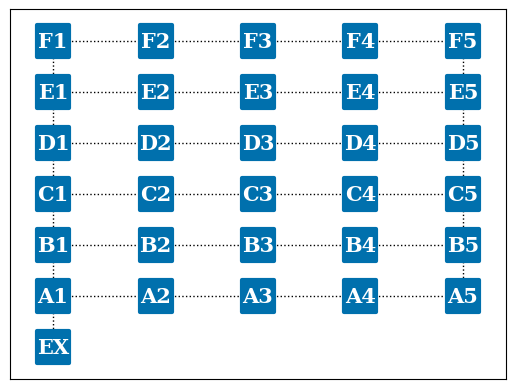

In [18]:
nx.draw_networkx(g, pos, with_labels=True, node_size=500, node_color=(0, 0.4392, 0.6784), 
                 node_shape='s', linewidths=3, style=':', font_size=15, font_color="white", 
                 font_weight="bold", font_family="serif"
                )

finding shortest paths between consecutive nodes

In [5]:
items = ["D2", "C2", "E4", "B4", "B1", "F1", "A1"]
path = []

path.append(items[0])
for x in range(len(items)):
      if x < (len(items) - 1):
            shortest = nx.shortest_path(g, source=items[x], target=items[x + 1])

            print(f"""Shortest path between {items[x]} and {items[x + 1]}:
                  {shortest}""")
            
            for i in range(len(shortest)):
                  if i > 0:
                        path.append(shortest[i])
            
print(f"\nComplete Path:\n{path}")

Shortest path between D2 and C2:
                  ['D2', 'D1', 'C1', 'C2']
Shortest path between C2 and E4:
                  ['C2', 'C1', 'D1', 'E1', 'E2', 'E3', 'E4']
Shortest path between E4 and B4:
                  ['E4', 'E5', 'D5', 'C5', 'B5', 'B4']
Shortest path between B4 and B1:
                  ['B4', 'B3', 'B2', 'B1']
Shortest path between B1 and F1:
                  ['B1', 'C1', 'D1', 'E1', 'F1']
Shortest path between F1 and A1:
                  ['F1', 'E1', 'D1', 'C1', 'B1', 'A1']

Complete Path:
['D2', 'D1', 'C1', 'C2', 'C1', 'D1', 'E1', 'E2', 'E3', 'E4', 'E5', 'D5', 'C5', 'B5', 'B4', 'B3', 'B2', 'B1', 'C1', 'D1', 'E1', 'F1', 'E1', 'D1', 'C1', 'B1', 'A1']


sorting for path efficiency

In [6]:
print(f"Unsorted items: {items}")

aisle_letters = ['A', 'B', 'C', 'D', 'E', 'F']
sorted_items = []

for aisle_letter in aisle_letters:
    for x in range(len(items)):
        if aisle_letter in items[x]:
            sorted_items.append(items[x])

    for x in range(len(sorted_items)):
        if x < (len(sorted_items) - 1):
            if sorted_items[x] > sorted_items[x + 1]:
                temp = sorted_items[x]
                sorted_items[x] = sorted_items[x + 1]
                sorted_items[x + 1] = temp

print(f"Sorted items: {sorted_items}")

Unsorted items: ['D2', 'C2', 'E4', 'B4', 'B1', 'F1', 'A1']
Sorted items: ['A1', 'B1', 'B4', 'C2', 'D2', 'E4', 'F1']


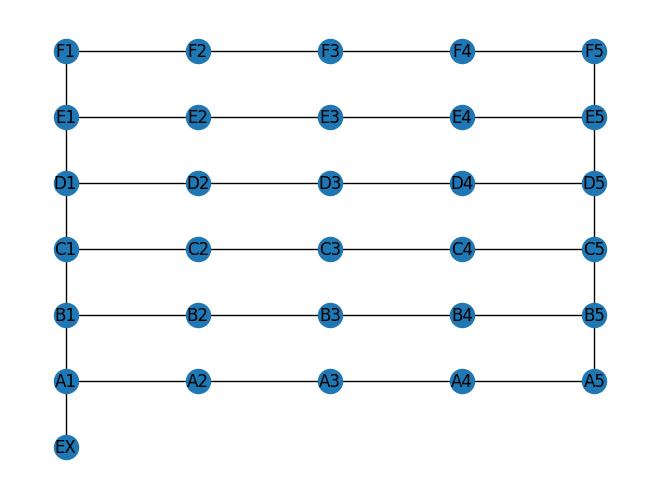

In [7]:
nx.draw(g, pos, with_labels=True)

calculating path again with sorted list

In [8]:
path = []

path.append(sorted_items[0])
for x in range(len(sorted_items)):
      if x < (len(sorted_items) - 1):
            shortest = nx.shortest_path(g, source=sorted_items[x], target=sorted_items[x + 1])

            print(f"""Shortest path between {sorted_items[x]} and {sorted_items[x + 1]}:
                  {shortest}""")
            
            for i in range(len(shortest)):
                  if i > 0:
                        path.append(shortest[i])
            
print(f"\nComplete Path:\n{path}")

Shortest path between A1 and B1:
                  ['A1', 'B1']
Shortest path between B1 and B4:
                  ['B1', 'B2', 'B3', 'B4']
Shortest path between B4 and C2:
                  ['B4', 'B3', 'B2', 'B1', 'C1', 'C2']
Shortest path between C2 and D2:
                  ['C2', 'C1', 'D1', 'D2']
Shortest path between D2 and E4:
                  ['D2', 'D1', 'E1', 'E2', 'E3', 'E4']
Shortest path between E4 and F1:
                  ['E4', 'E3', 'E2', 'E1', 'F1']

Complete Path:
['A1', 'B1', 'B2', 'B3', 'B4', 'B3', 'B2', 'B1', 'C1', 'C2', 'C1', 'D1', 'D2', 'D1', 'E1', 'E2', 'E3', 'E4', 'E3', 'E2', 'E1', 'F1']
